In [ ]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [ ]:
I = 40
K = 4
D = 1350
M = 1000

In [ ]:
class Client_info:
    def __init__(self, cid, D, M):
        self.cid = cid
        self.x, self.y = self.generate_distance()
        self.D = D
        self.M = M
        self.delta = 5
        self.U = np.random.uniform(1.0, 3.0) * 10000.0
        self.f = np.random.uniform(1.0, 2.0)
        self.B = np.random.uniform(1.0, 10.0)
        self.p = np.random.uniform(20.0, 40.0)
        self.N = -104.0
        self.tcomp = self.computation_time()

    def generate_distance(self):
        x = np.random.uniform(1.0, 500.0)
        y = np.random.uniform(1.0, 500.0)
        return x, y

    def g(self, cluster_head):
        head_x, head_y = cluster_head
        d = np.sqrt((head_x - self.x) ** 2 + (head_y - self.y) ** 2)
        if(d == 0):
          return 0
        return -128.1 - 37.6 * np.log10(d)

    def computation_time(self):
        return (self.D * self.delta * self.U) / self.f

    def communication_time(self, cluster_head):
        g = self.g(cluster_head)
        if(g == 0):
            return 0
        else:
            self.r = self.B * np.log2(1 + g * self.p / self.N)
            return self.M / self.r

    def total_time(self, cluster_head):
        tcomm = self.communication_time(cluster_head)
        return self.tcomp + tcomm

    def Info(self):
      print(
            f"ID: {self.cid}\n",
            f"Location x = {self.x:.2f}, y = {self.y:.2f}\n",
            f"Computing capability: {self.f:.2f}\n",
            f"CPU cycles: {self.U:.2f}\n",
            f"Transmit bandwidth: {self.B:.2f}\n",
            f"Transmit power: {self.p:.2f}\n",
        )

clients = [Client_info(id, D, M) for id in range(1, I + 1)]

In [ ]:
print(len(clients))
for client in clients:
  client.Info()

40
ID: 1
 Location x = 399.56, y = 498.76
 Computing capability: 1.13
 CPU cycles: 11668.79
 Transmit bandwidth: 2.36
 Transmit power: 21.17

ID: 2
 Location x = 466.55, y = 31.69
 Computing capability: 1.87
 CPU cycles: 27245.50
 Transmit bandwidth: 7.60
 Transmit power: 35.47

ID: 3
 Location x = 323.36, y = 57.70
 Computing capability: 1.12
 CPU cycles: 19545.60
 Transmit bandwidth: 5.12
 Transmit power: 31.89

ID: 4
 Location x = 120.25, y = 427.26
 Computing capability: 1.55
 CPU cycles: 15360.27
 Transmit bandwidth: 4.83
 Transmit power: 28.17

ID: 5
 Location x = 274.10, y = 213.87
 Computing capability: 1.89
 CPU cycles: 16079.86
 Transmit bandwidth: 2.28
 Transmit power: 33.49

ID: 6
 Location x = 391.26, y = 14.73
 Computing capability: 1.20
 CPU cycles: 17947.38
 Transmit bandwidth: 1.38
 Transmit power: 33.73

ID: 7
 Location x = 380.20, y = 191.35
 Computing capability: 1.96
 CPU cycles: 27759.02
 Transmit bandwidth: 7.26
 Transmit power: 20.82

ID: 8
 Location x = 212.90,

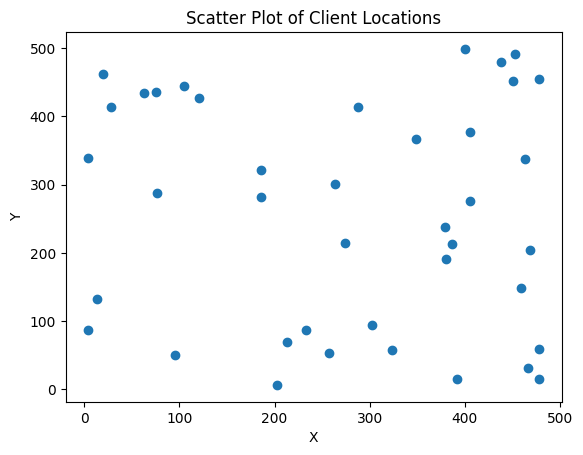

In [ ]:
Location = [[client.x, client.y] for client in clients]
Location_array = np.array(Location)

plt.scatter(Location_array[:, 0], Location_array[:, 1])

plt.title('Scatter Plot of Client Locations')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
def initialize_centers_and_weights(K, X, I):
    X = np.array(X)
    return X[np.random.choice(len(X), K, replace=False)], np.ones(K) / I, np.zeros(K)

def calculate_t_i(clients, centers):
    centers = [(center.x, center.y) for center in centers]
    t = []
    for client in clients:
        t_client = []
        for center in centers:
            t_client.append(client.total_time(center))
        t.append(t_client)

    return t

def update_assignments(weights, centers, t, m, p): # công thức 6
    K= len(weights)
    I = len(t)
    assignments = np.zeros((K, I))
    for i in range(I):
        distances = np.zeros(K)
        for k in range(K):
            distances[k] = (weights[k] ** p) * np.linalg.norm(t[i][k] - m[k]) ** 2
        assignments[np.argmin(distances), i] = 1
    return assignments

def update_centers_variances(assignments): # công thức 9 và 7
    K, I = assignments.shape

    centers = np.sum(assignments[:, :, None] * np.arange(I), axis=1) / np.sum(assignments, axis=1)[:, None]
    variances = np.sum(assignments * np.linalg.norm(np.arange(I)[:, None] - centers[:, None]) ** 2, axis=1)

    return centers, variances

def update_weights_with_memory(weights, variances, beta):
    return beta * weights + (1 - beta) * (variances ** (1 / (1 - p))) / np.sum((variances ** (1 / (1 - p))))


In [ ]:
def clustering_algorithm(clients_info, K, p, beta, epsilon, R_max):
    I = len(clients_info)
    R = 0
    centers, weights, variance = initialize_centers_and_weights(K, clients_info, I)
    m = [center.tcomp for center in centers]
    t = calculate_t_i(clients_info, centers)

    while True:
        R = R + 1
        x = update_assignments(weights, centers, t, m, p)

        centers, variances = update_centers_variances(x)

        weights = update_weights_with_memory(weights, variances, beta)

        omega_w = np.sum(weights ** p * variances)

        epsilon_condition = 0
        if R > 1:
            epsilon_condition = omega_w - omega_w_prev > epsilon

        omega_w_prev = omega_w

        if(R > R_max or epsilon_condition > epsilon):
            return np.array(x)


In [ ]:
epsilon = 0.95
R_max = 5
p = 0.5
Beta = 0.8

cluster = clustering_algorithm(clients, K, p, beta, epsilon, R_max)

In [ ]:
cluster

array([[1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0.,
        0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 1., 1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1.,
        0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 1., 0., 0., 0.]])

In [ ]:
for i, row in enumerate(cluster):
    print(f"Cluster {i + 1} - include clients: {np.where(row == 1)[0]}")

Cluster 1 - include clients: [ 0  3  4  8  9 10 13 18 19 30 33 34 35 39]
Cluster 2 - include clients: [ 1  5  6 16 21 24 26 27 28 37 38]
Cluster 3 - include clients: [ 2 22 23 29 32]
Cluster 4 - include clients: [ 7 11 12 14 15 17 20 25 31 36]
